### scipy curve fit

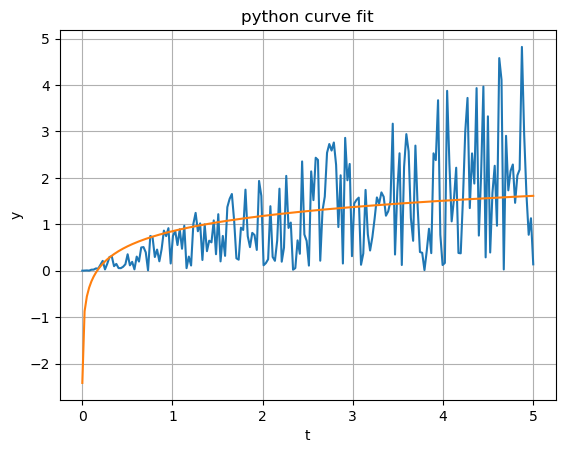

In [112]:
from numpy import linspace, log, sin, pi
from matplotlib import pyplot as plt 
from random import random 
from scipy.optimize import curve_fit 

t = linspace(0.001, 5, 200)
y = [] 

# create random data
for i in t:
    y.append(i*random())
    
def linear(x, a, b):   # for linear line 
    return a*x + b

def logarithmic(x, a, b):   # for curve line 
    return a*log(x) + b

# get curve fit values 
# constants = curve_fit(linear, t, y)
constants = curve_fit(logarithmic, t, y)
a_fit = constants[0][0]
b_fit = constants[0][1]

fit = [] 
for i in t:
#     fit.append(linear(i, a_fit, b_fit))   # populate fit data 
    fit.append(logarithmic(i, a_fit, b_fit))   # draw curve line 
    
# a_guess = 5 
# b_guess = 1.65 
# fit = [] 
# for i in t:
#     fit.append(linear(i, a_guess, b_guess))
    
plt.plot(t, y)
plt.plot(t, fit)   # draw curve fit line
plt.grid()
plt.xlabel("t")
plt.ylabel("y")
plt.title("python curve fit")
plt.show()


In [107]:
help(random)

Help on built-in function random:

random() method of random.Random instance
    random() -> x in the interval [0, 1).



In [90]:
# import libraries
import numpy as np 
import csv 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate as intg

In [8]:
# load csv
with open("car-sales.csv", "r") as f:
    rawdata = list(csv.reader(f, delimiter=","))
    
rawdata[0:5]

[['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'],
 ['Honda', 'White', '35431', '4', '15323'],
 ['BMW', 'Blue', '192714', '5', '19943'],
 ['Honda', 'White', '84714', '4', '28343'],
 ['Toyota', 'White', '154365', '4', '13434']]

In [9]:
import pandas as pd 
df = pd.read_csv("car-sales.csv")
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [14]:
df[['Odometer (KM)','Price']]

,Odometer (KM),Price
0,35431,15323
1,192714,19943
2,84714,28343
3,154365,13434
4,181577,14043
...,...,...
995,35820,32042
996,155144,5716
997,66604,31570
998,215883,4001


In [19]:
# extract 2 columns data, put into np.array
exampledata = np.array(df[['Odometer (KM)','Price']])
exampledata[:5]

array([[ 35431,  15323],
       [192714,  19943],
       [ 84714,  28343],
       [154365,  13434],
       [181577,  14043]])

In [51]:
# define x, y
xdata = exampledata[:, 0]   # all rows, col 1, odometer
ydata = exampledata[:, 1]   # all rows, col 2

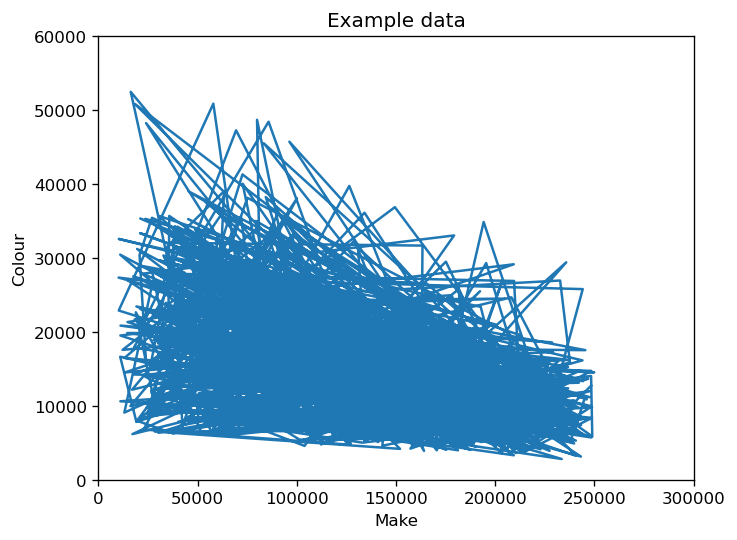

In [78]:
# plot 
plt.figure(1, dpi=120)    # set dpi resolution 
plt.title("Example data")
plt.xlabel(rawdata[0][0])  # set label from header row
plt.ylabel(rawdata[0][1])
plt.xlim(0, 300000)   # set limit
plt.ylim(0, 60000)
plt.xscale("linear")   # scale option
plt.yscale("linear")
plt.plot(xdata, ydata, label="Example data")

In [85]:
# define constants 
a0 = 1  # some contant to apply 
a1 = 1000

# define func to process data 
def func(x, b):
#     return a0*np.exp(-b*x)+a1
    return x/a1   # scale 1/1000


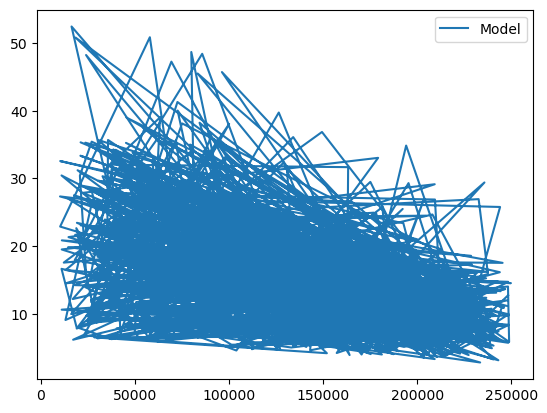

In [86]:
# evaluate and plot function 
funcdata = func(ydata, 1.5)
plt.plot(xdata, funcdata, label="Model")
plt.legend()

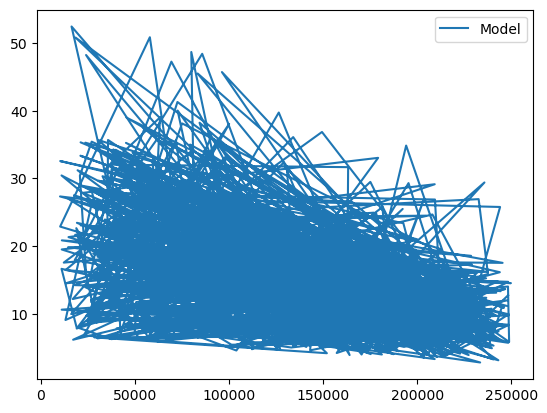

In [87]:
# curvve fit data to model 
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0,4))
perr = np.sqrt(np.diag(pcov))
plt.plot(xdata, funcdata, label="Model")
plt.legend()

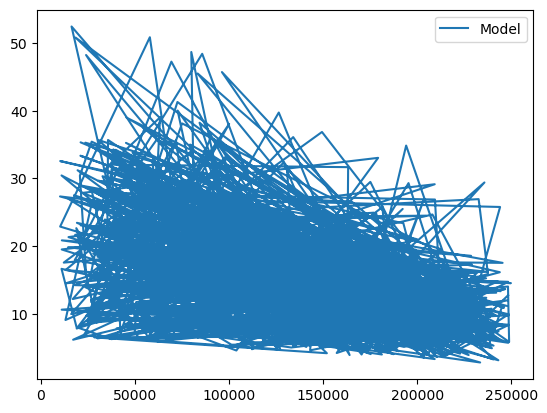

In [94]:
# integral 

TotalInt = intg.trapz(ydata, xdata) 
TotalInt_func = intg.quad(func, 0, 4, args=(1.375))[0]
TotalInt_func_low = intg.quad(func, 0, 2, args=(1.375))[0]
TotalInt_func_high = intg.quad(func, 0, 4, args=(1.375))[0]
ratio = TotalInt_func_low/TotalInt_func_high

plt.plot(xdata, funcdata, label="Model")
plt.legend()